In [1]:
from reservoir_rls_multires import *
import matplotlib.pyplot as plt
from lorenz63 import *
from scipy.signal import welch, periodogram
import cma

In [2]:
x = double_reservoir(3,300,input_weight = [.1,.2])

In [ ]:
data_length = 10000
step = 0.05
f_s = 1/step
# scale = 0.02
rho = 28
r_t = lambda x: r_t_const(x)
dx_dt = lambda x, time, r_t: dxdt_lorenz(x, time, r_t, rho = rho)
lorenz_data = getLorenzData(data_length, r_t, dx_dt, sample_tau = step)
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(111,projection = '3d')
ax.plot3D(lorenz_data[:,0],lorenz_data[:,1],lorenz_data[:,2])
plt.show()

rho = 48
r_t = lambda x: r_t_const(x)
dx_dt = lambda x, time, r_t: dxdt_lorenz(x, time, r_t, rho = rho)
lorenz_data = getLorenzData(data_length, r_t, dx_dt, sample_tau = step)
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(111,projection = '3d')
ax.plot3D(lorenz_data[:,0],lorenz_data[:,1],lorenz_data[:,2])
plt.show()

rho = 60
r_t = lambda x: r_t_const(x)
dx_dt = lambda x, time, r_t: dxdt_lorenz(x, time, r_t, rho = rho)
lorenz_data = getLorenzData(data_length, r_t, dx_dt, sample_tau = step)
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(111,projection = '3d')
ax.plot3D(lorenz_data[:,0],lorenz_data[:,1],lorenz_data[:,2])
plt.show()

OverflowError: Exceeded cell block limit (set 'agg.path.chunksize' rcparam)

<Figure size 576x576 with 1 Axes>

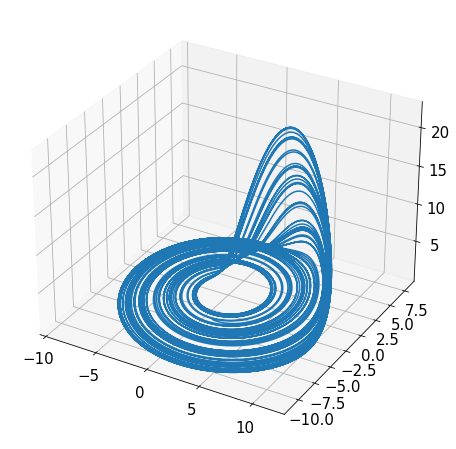

In [33]:
data_length = 5000000
step = 0.05
f_s = 1/step
scale = 0.01
slow_var = 48/28
r_t = lambda x: r_t_const(x)
dx_dt = lambda x, time, r_t: dxdt_lorenz_rossler(x, time, r_t, scale = scale, slow_var = slow_var)
lorenz_data_rossler = getCoupledLorenzData(data_length, r_t, dx_dt, sample_tau = step)
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(111,projection = '3d')
ax.plot3D(lorenz_data_rossler[:,0],lorenz_data_rossler[:,1],lorenz_data_rossler[:,2])
plt.show()
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(111,projection = '3d')
ax.plot3D(lorenz_data_rossler[:,3],lorenz_data_rossler[:,4],lorenz_data_rossler[:,5])
plt.show()
scaled_data = lorenz_data_rossler[:,:3]
scaled_data = np.ascontiguousarray(scaled_data)

(50001,)
(50001,)
[0.0016]
[625.]


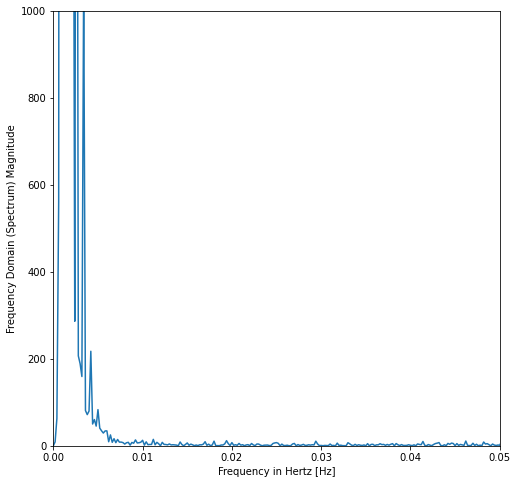

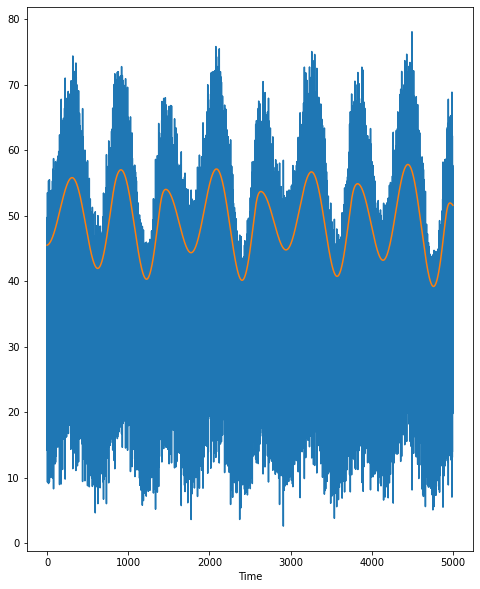

In [16]:
var = 2
nperseg = 100000

f_s = 1/step
freqs, X = periodogram(lorenz_data_rossler[:,var], f_s, scaling = 'density')
print(X.shape)
print(freqs.shape)
fig, ax = plt.subplots(figsize = (8,8))

ax.plot(freqs, np.abs(X))
ax.set_xlabel('Frequency in Hertz [Hz]')
ax.set_ylabel('Frequency Domain (Spectrum) Magnitude')
ax.set_xlim(0, .05)
ax.set_ylim(0, 1000)

freqsr, Xr = periodogram(lorenz_data_rossler[:,4], f_s, scaling = 'density')
top_freq = freqsr[np.abs(Xr) == np.max(np.abs(Xr))]
print(top_freq)
print(1/top_freq)

fig2 = plt.figure(figsize = (8,10))
plt.plot(np.arange(lorenz_data_rossler[:,var].size)*0.05, lorenz_data_rossler[:,var])
plt.xlabel('Time')

var = 4
plt.plot(np.arange(lorenz_data_rossler[:,var].size)*0.05, lorenz_data_rossler[:,var]+50)

plt.show()

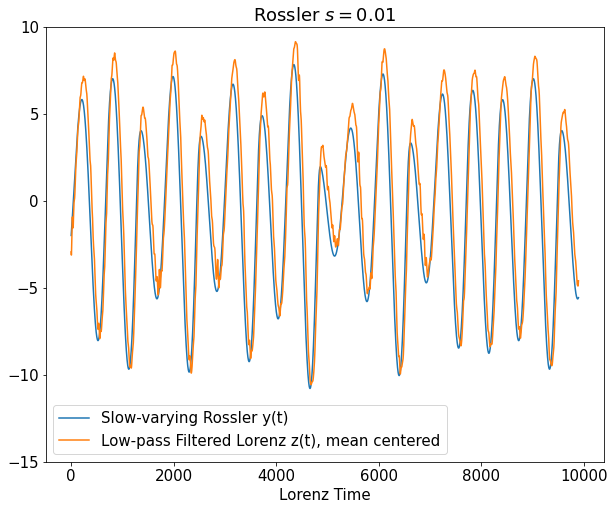

In [38]:
"""
calc_length = 1000
num_points = int(lorenz_data_rossler.shape[0]/calc_length)
stds = np.zeros((num_points,3))
means = np.zeros((num_points,3))
start = 0
for i in range(num_points):
    stds[i] = np.std(lorenz_data_rossler[start:start+calc_length,:3], axis = 0)
    means[i] = np.mean(lorenz_data_rossler[start:start+calc_length,:3], axis = 0)
    start += calc_length


times = np.arange(1,num_points+1)*0.05*calc_length
figstd = plt.figure(figsize = (10,10))
plt.plot(times,stds[:,0])
plt.plot(times,stds[:,1])
plt.plot(times,stds[:,2])
plt.plot(np.arange(lorenz_data_rossler[:,var].size)*0.05, lorenz_data_rossler[:,var]+20)
plt.show()
"""
plt.rcParams.update({'font.size': 15})
var = 4
idxs = np.arange(2000,200000,dtype = int)
figstd = plt.figure(figsize = (10,8))
#plt.plot(times,means[:,2])
plt.plot(np.arange(lorenz_data_rossler[idxs,var].size)*0.05, lorenz_data_rossler[idxs,var], label = 'Slow-varying Rossler y(t)')
plt.plot(np.arange(lorenz_data_rossler[idxs,var].size)*0.05, lorenz_data_split[idxs,5]-np.mean(lorenz_data_split[idxs,5]), label = 'Low-pass Filtered Lorenz z(t), mean centered')
plt.ylim(-15,10)
plt.title(r'Rossler $s=0.01$')
plt.xlabel('Lorenz Time')
plt.legend()
plt.savefig('rossler_y_vs_lorenz_z_filtered.png')
plt.show()

In [34]:
Wn_xy = 0.03
Wn_z = Wn_xy
lorenz_data_split = separate_lorenz_2scale(lorenz_data_rossler[:,:3], f_s, Wn_xy, Wn_z, filter_order = 10)
print(np.mean(lorenz_data_split, axis = 0))
print(np.std(lorenz_data_split, axis = 0))

[ 1.33330595e-03  1.36912155e-03  2.55714201e-02 -4.82517735e-02
 -4.82363018e-02  3.41277925e+01]
[ 9.7415398  11.36262983 10.48468277  1.99043879  1.99055847  5.24449571]


In [52]:
rossler_data_w_lowfreq = np.hstack((lorenz_data_rossler[:,:3],lorenz_data_split[:,5].reshape(-1,1)))
rossler_data_w_lowfreq = np.ascontiguousarray(rossler_data_w_lowfreq)

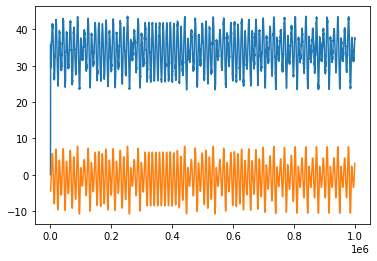

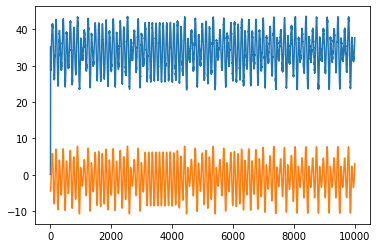

In [56]:
plt.plot(rossler_data_w_lowfreq[:,3])
plt.plot(lorenz_data_rossler[:,4])
plt.show()
plt.plot(rossler_data_w_lowfreq[::100,3])
plt.plot(lorenz_data_rossler[::100,4])
plt.show()

In [6]:
data_length = 2500000
step = 0.05
f_s = 1/step
scale = 1
r_t = lambda x: r_t_const(x)
dx_dt = lambda x, time, r_t: dxdt_rossler(x, time, r_t, scale = scale)
rossler_data = getLorenzData(data_length, r_t, dx_dt, sample_tau = step)

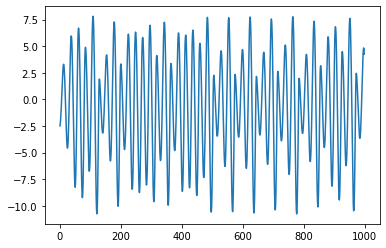

NameError: name 'lorenz_data_rossler' is not defined

In [3]:
rossler_data.shape
plt.plot(rossler_data[:1000,1])
plt.show()
plt.plot(lorenz_data_rossler[:1000,1])
plt.show()

  0%|                                                                                          | 0/100 [00:00<?, ?it/s]

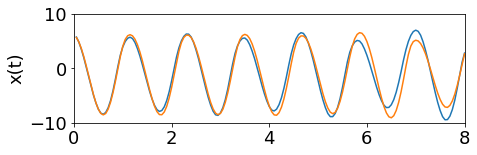

  1%|▊                                                                                 | 1/100 [00:00<00:12,  7.79it/s]

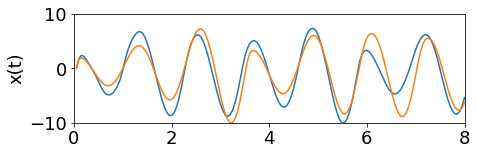

  2%|█▋                                                                                | 2/100 [00:00<00:12,  7.81it/s]

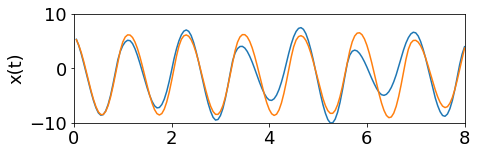

  3%|██▍                                                                               | 3/100 [00:00<00:12,  7.69it/s]

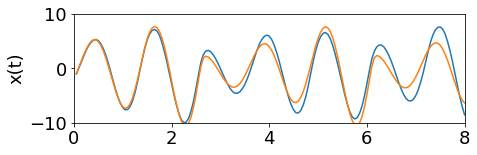

  4%|███▎                                                                              | 4/100 [00:00<00:12,  7.65it/s]

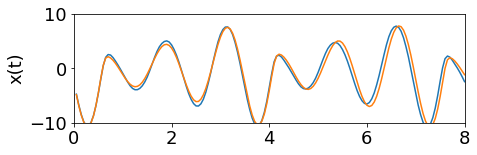

  5%|████                                                                              | 5/100 [00:00<00:12,  7.59it/s]

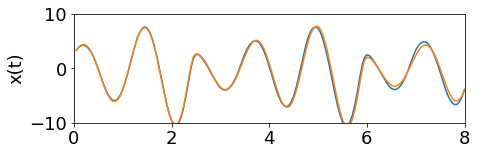

  6%|████▉                                                                             | 6/100 [00:00<00:12,  7.39it/s]

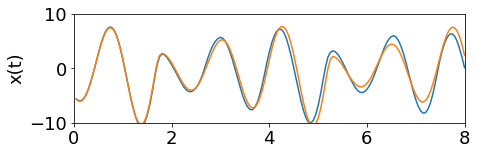

  7%|█████▋                                                                            | 7/100 [00:00<00:12,  7.46it/s]

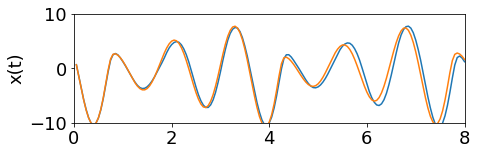

  8%|██████▌                                                                           | 8/100 [00:01<00:12,  7.34it/s]

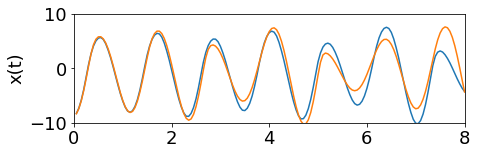

  9%|███████▍                                                                          | 9/100 [00:01<00:12,  7.30it/s]

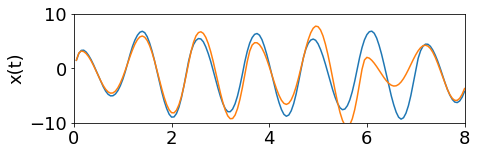

 10%|████████                                                                         | 10/100 [00:01<00:12,  7.38it/s]

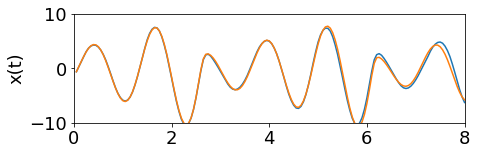

 11%|████████▉                                                                        | 11/100 [00:01<00:11,  7.42it/s]

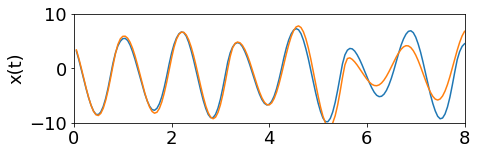

 12%|█████████▋                                                                       | 12/100 [00:01<00:11,  7.37it/s]

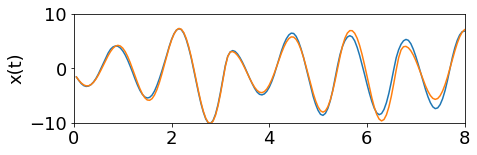

 13%|██████████▌                                                                      | 13/100 [00:01<00:11,  7.52it/s]

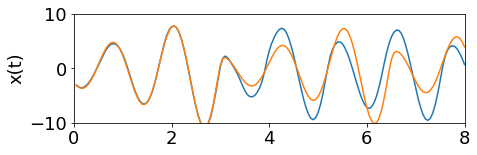

 14%|███████████▎                                                                     | 14/100 [00:01<00:11,  7.43it/s]

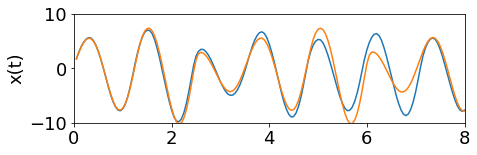

 15%|████████████▏                                                                    | 15/100 [00:02<00:11,  7.36it/s]

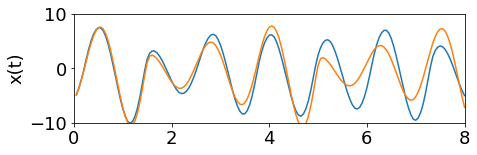

 16%|████████████▉                                                                    | 16/100 [00:02<00:11,  7.33it/s]

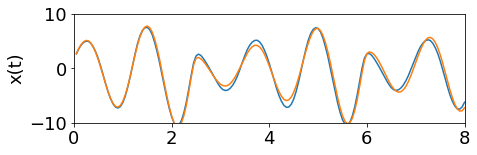

 17%|█████████████▊                                                                   | 17/100 [00:02<00:11,  7.44it/s]

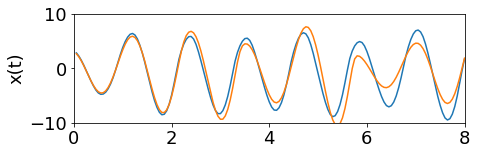

 18%|██████████████▌                                                                  | 18/100 [00:02<00:11,  7.37it/s]

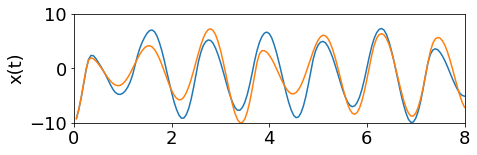

 19%|███████████████▍                                                                 | 19/100 [00:02<00:10,  7.40it/s]

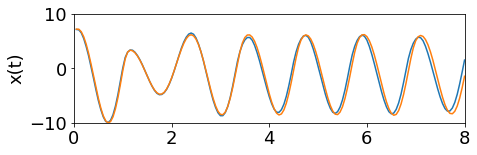

 20%|████████████████▏                                                                | 20/100 [00:02<00:10,  7.52it/s]

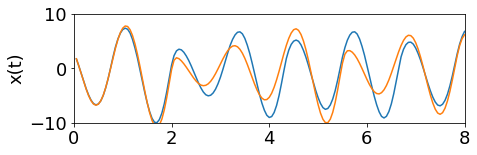

 21%|█████████████████                                                                | 21/100 [00:02<00:11,  6.61it/s]

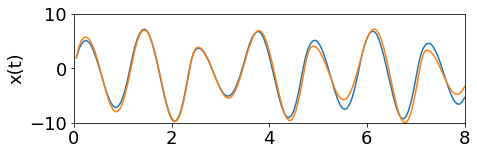

 22%|█████████████████▊                                                               | 22/100 [00:03<00:11,  6.83it/s]

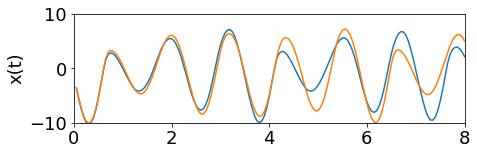

 23%|██████████████████▋                                                              | 23/100 [00:03<00:10,  7.10it/s]

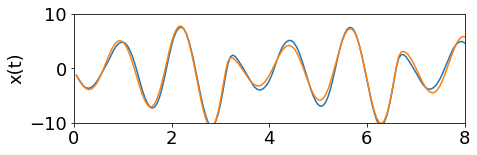

 24%|███████████████████▍                                                             | 24/100 [00:03<00:10,  7.25it/s]

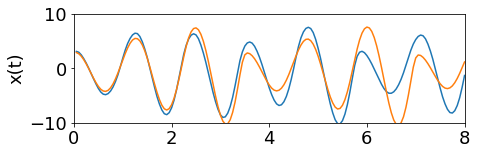

 25%|████████████████████▎                                                            | 25/100 [00:03<00:10,  7.25it/s]

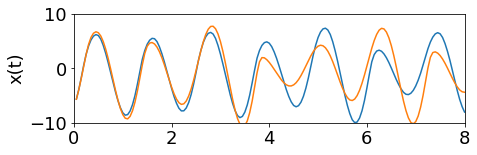

 26%|█████████████████████                                                            | 26/100 [00:03<00:10,  7.30it/s]

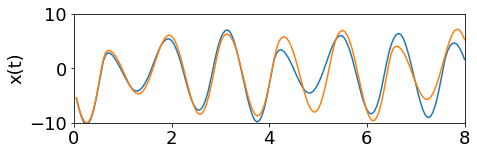

 27%|█████████████████████▊                                                           | 27/100 [00:03<00:09,  7.43it/s]

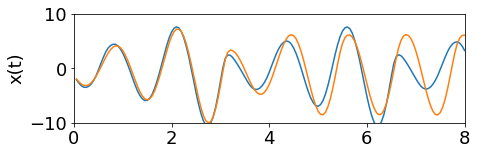

 28%|██████████████████████▋                                                          | 28/100 [00:03<00:09,  7.40it/s]

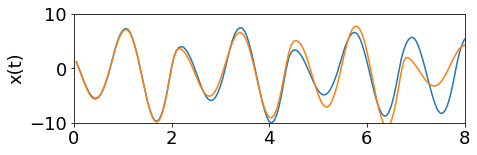

 29%|███████████████████████▍                                                         | 29/100 [00:03<00:09,  7.45it/s]

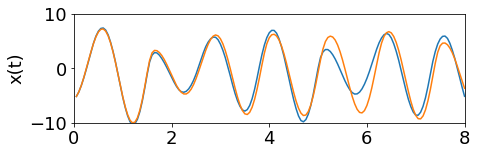

 30%|████████████████████████▎                                                        | 30/100 [00:04<00:09,  7.50it/s]

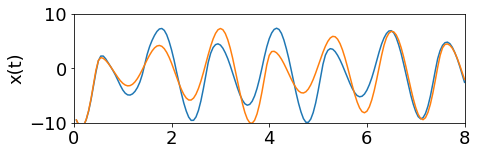

 31%|█████████████████████████                                                        | 31/100 [00:04<00:09,  7.65it/s]

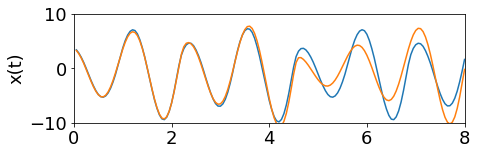

 32%|█████████████████████████▉                                                       | 32/100 [00:04<00:08,  7.70it/s]

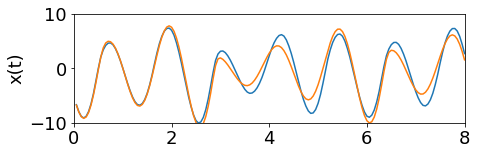

 33%|██████████████████████████▋                                                      | 33/100 [00:04<00:08,  7.80it/s]

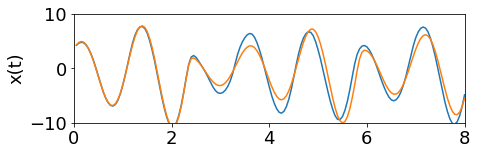

 34%|███████████████████████████▌                                                     | 34/100 [00:04<00:08,  7.69it/s]

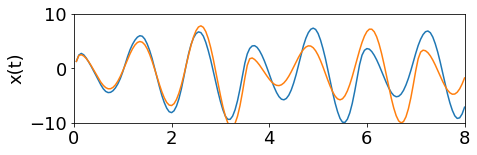

 35%|████████████████████████████▎                                                    | 35/100 [00:04<00:08,  7.58it/s]

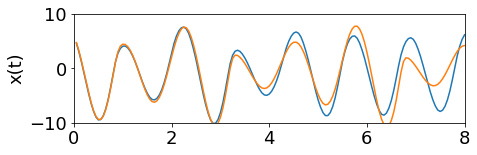

 36%|█████████████████████████████▏                                                   | 36/100 [00:04<00:08,  7.47it/s]

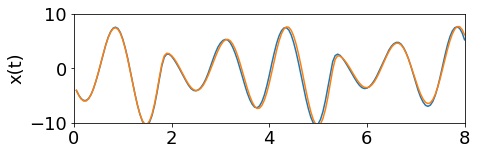

 37%|█████████████████████████████▉                                                   | 37/100 [00:04<00:08,  7.52it/s]

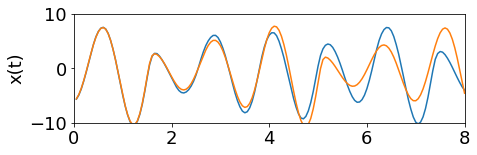

 38%|██████████████████████████████▊                                                  | 38/100 [00:05<00:08,  7.62it/s]

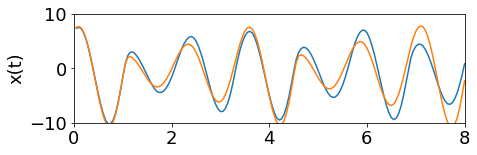

 39%|███████████████████████████████▌                                                 | 39/100 [00:05<00:07,  7.70it/s]

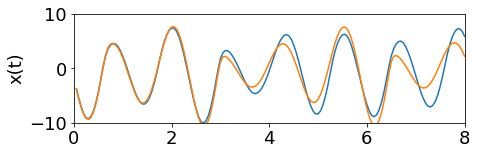

 40%|████████████████████████████████▍                                                | 40/100 [00:05<00:07,  7.50it/s]

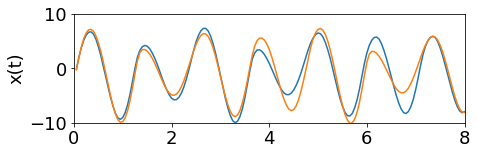

 41%|█████████████████████████████████▏                                               | 41/100 [00:05<00:07,  7.49it/s]

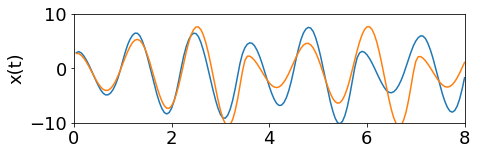

 42%|██████████████████████████████████                                               | 42/100 [00:05<00:08,  6.72it/s]

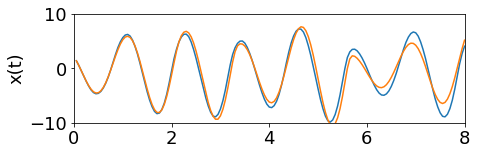

 43%|██████████████████████████████████▊                                              | 43/100 [00:05<00:08,  6.92it/s]

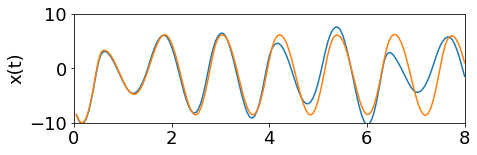

 44%|███████████████████████████████████▋                                             | 44/100 [00:05<00:07,  7.20it/s]

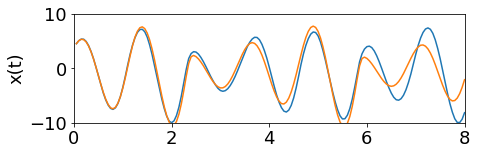

 45%|████████████████████████████████████▍                                            | 45/100 [00:06<00:07,  7.36it/s]

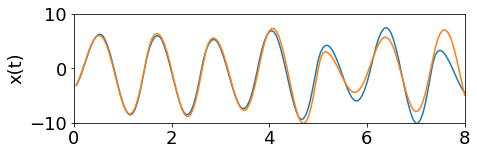

 46%|█████████████████████████████████████▎                                           | 46/100 [00:06<00:07,  7.50it/s]

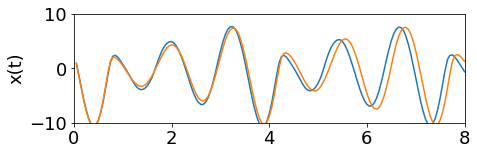

 47%|██████████████████████████████████████                                           | 47/100 [00:06<00:07,  7.40it/s]

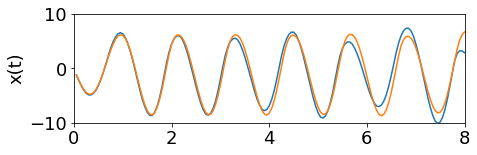

 48%|██████████████████████████████████████▉                                          | 48/100 [00:06<00:07,  7.32it/s]

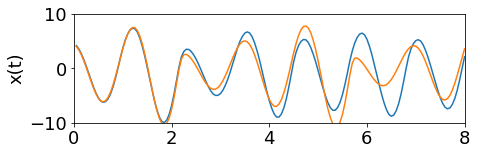

 49%|███████████████████████████████████████▋                                         | 49/100 [00:06<00:06,  7.32it/s]

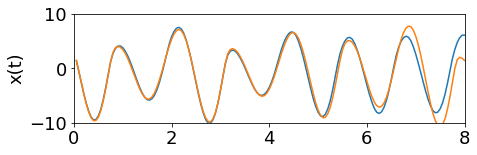

 50%|████████████████████████████████████████▌                                        | 50/100 [00:06<00:06,  7.45it/s]

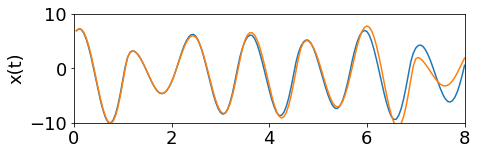

 51%|█████████████████████████████████████████▎                                       | 51/100 [00:06<00:06,  7.33it/s]

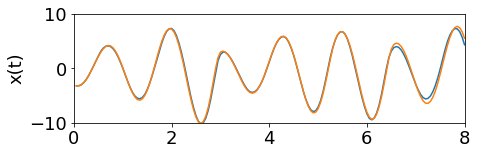

 52%|██████████████████████████████████████████                                       | 52/100 [00:07<00:06,  7.35it/s]

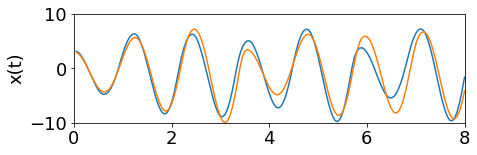

 53%|██████████████████████████████████████████▉                                      | 53/100 [00:07<00:06,  7.28it/s]

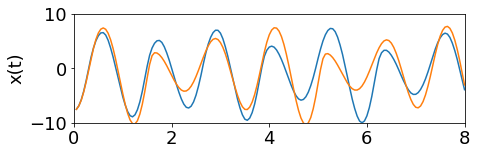

 54%|███████████████████████████████████████████▋                                     | 54/100 [00:07<00:06,  7.27it/s]

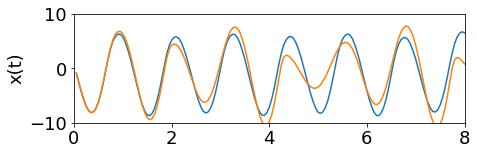

 55%|████████████████████████████████████████████▌                                    | 55/100 [00:07<00:06,  7.35it/s]

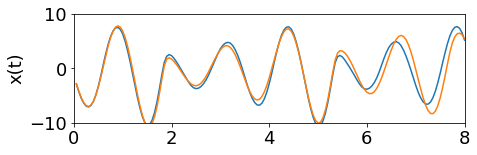

 56%|█████████████████████████████████████████████▎                                   | 56/100 [00:07<00:05,  7.35it/s]

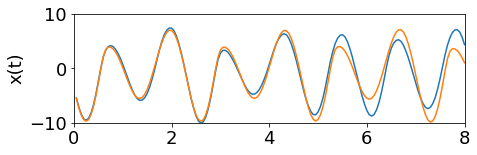

 57%|██████████████████████████████████████████████▏                                  | 57/100 [00:07<00:05,  7.50it/s]

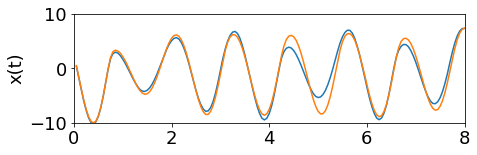

 58%|██████████████████████████████████████████████▉                                  | 58/100 [00:07<00:05,  7.54it/s]

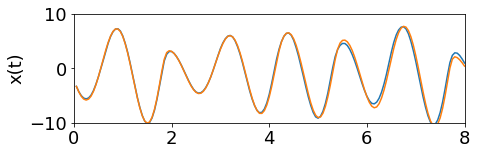

 59%|███████████████████████████████████████████████▊                                 | 59/100 [00:07<00:05,  7.68it/s]

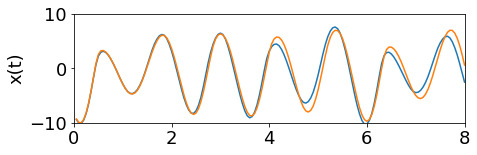

 60%|████████████████████████████████████████████████▌                                | 60/100 [00:08<00:05,  7.53it/s]

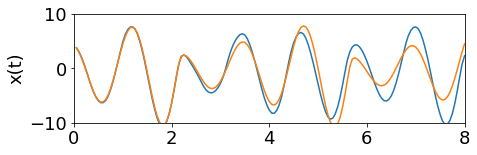

 61%|█████████████████████████████████████████████████▍                               | 61/100 [00:08<00:05,  7.59it/s]

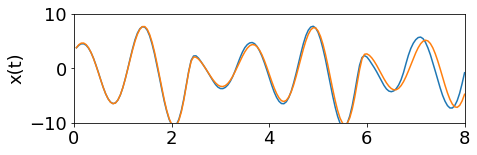

 62%|██████████████████████████████████████████████████▏                              | 62/100 [00:08<00:04,  7.64it/s]

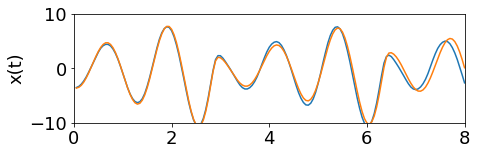

 63%|███████████████████████████████████████████████████                              | 63/100 [00:08<00:05,  6.66it/s]

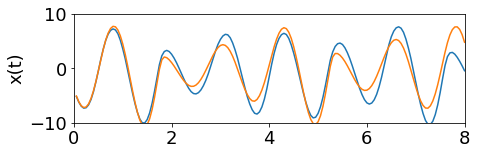

 64%|███████████████████████████████████████████████████▊                             | 64/100 [00:08<00:05,  6.98it/s]

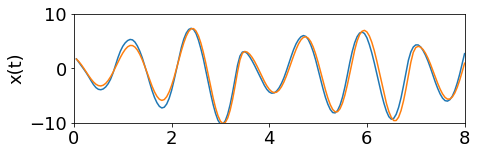

 65%|████████████████████████████████████████████████████▋                            | 65/100 [00:08<00:04,  7.20it/s]

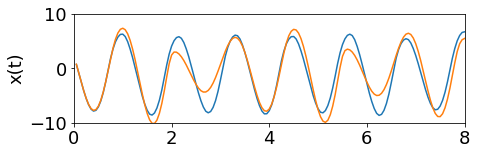

 66%|█████████████████████████████████████████████████████▍                           | 66/100 [00:08<00:04,  7.35it/s]

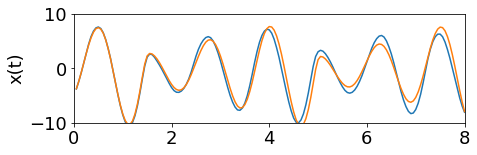

 67%|██████████████████████████████████████████████████████▎                          | 67/100 [00:09<00:04,  7.47it/s]

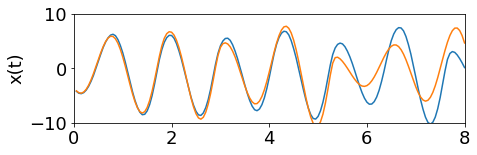

 68%|███████████████████████████████████████████████████████                          | 68/100 [00:09<00:04,  7.61it/s]

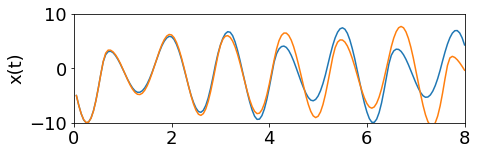

 69%|███████████████████████████████████████████████████████▉                         | 69/100 [00:09<00:04,  7.57it/s]

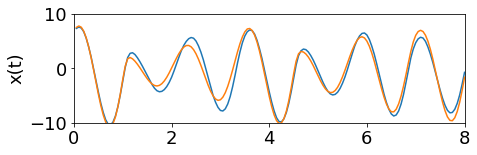

 70%|████████████████████████████████████████████████████████▋                        | 70/100 [00:09<00:03,  7.70it/s]

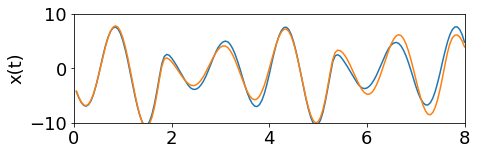

 71%|█████████████████████████████████████████████████████████▌                       | 71/100 [00:09<00:03,  7.72it/s]

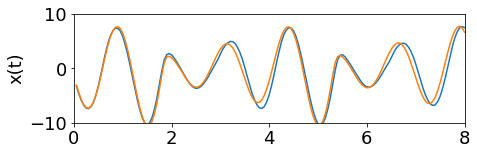

 72%|██████████████████████████████████████████████████████████▎                      | 72/100 [00:09<00:03,  7.72it/s]

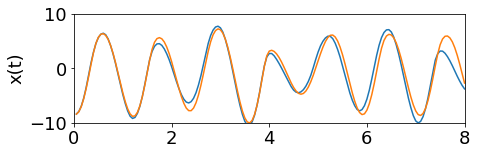

 73%|███████████████████████████████████████████████████████████▏                     | 73/100 [00:09<00:03,  7.71it/s]

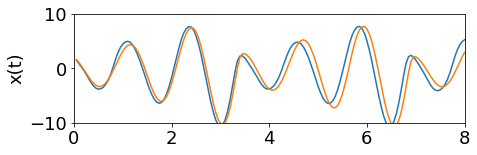

 74%|███████████████████████████████████████████████████████████▉                     | 74/100 [00:09<00:03,  7.61it/s]

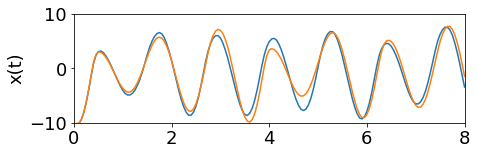

 75%|████████████████████████████████████████████████████████████▊                    | 75/100 [00:10<00:03,  7.68it/s]

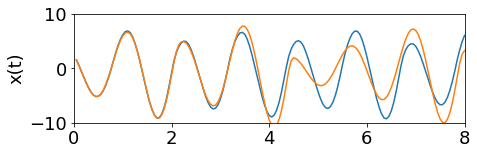

 76%|█████████████████████████████████████████████████████████████▌                   | 76/100 [00:10<00:03,  7.72it/s]

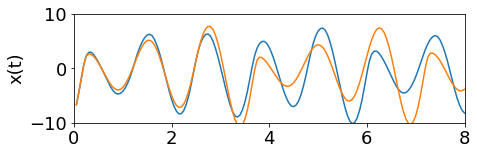

 77%|██████████████████████████████████████████████████████████████▎                  | 77/100 [00:10<00:02,  7.75it/s]

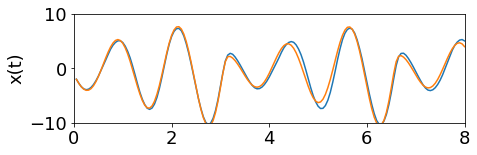

 78%|███████████████████████████████████████████████████████████████▏                 | 78/100 [00:10<00:02,  7.72it/s]

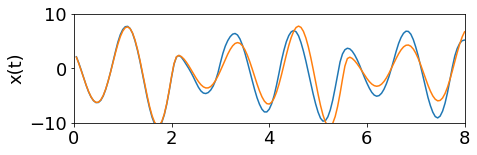

 79%|███████████████████████████████████████████████████████████████▉                 | 79/100 [00:10<00:02,  7.79it/s]

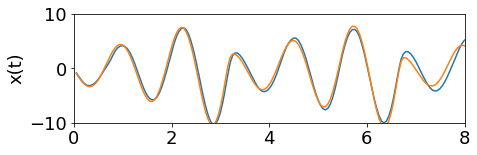

 80%|████████████████████████████████████████████████████████████████▊                | 80/100 [00:10<00:02,  7.73it/s]

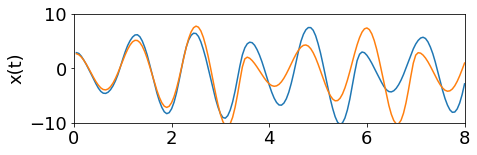

 81%|█████████████████████████████████████████████████████████████████▌               | 81/100 [00:10<00:02,  7.59it/s]

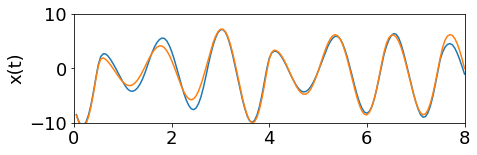

 82%|██████████████████████████████████████████████████████████████████▍              | 82/100 [00:11<00:02,  7.41it/s]

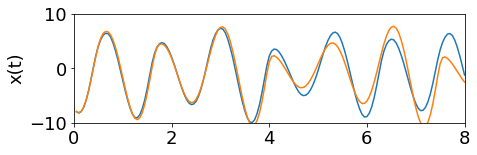

 83%|███████████████████████████████████████████████████████████████████▏             | 83/100 [00:11<00:02,  7.54it/s]

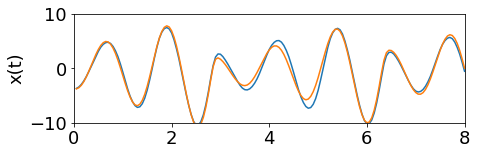

 84%|████████████████████████████████████████████████████████████████████             | 84/100 [00:11<00:02,  6.88it/s]

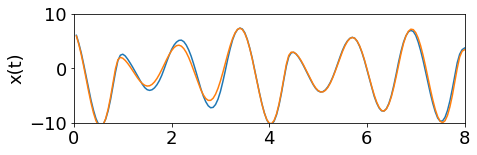

 85%|████████████████████████████████████████████████████████████████████▊            | 85/100 [00:11<00:02,  7.15it/s]

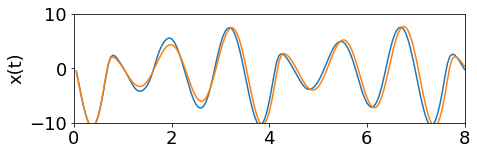

 86%|█████████████████████████████████████████████████████████████████████▋           | 86/100 [00:11<00:01,  7.37it/s]

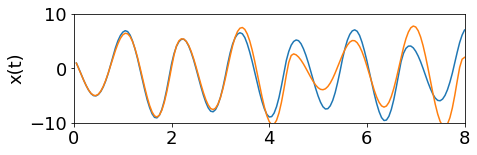

 87%|██████████████████████████████████████████████████████████████████████▍          | 87/100 [00:11<00:01,  7.44it/s]

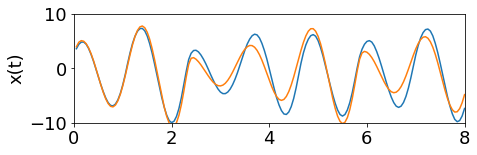

 88%|███████████████████████████████████████████████████████████████████████▎         | 88/100 [00:11<00:01,  7.50it/s]

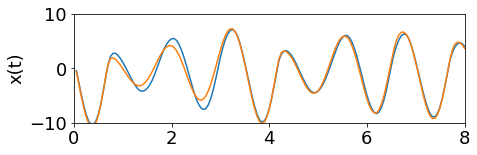

 89%|████████████████████████████████████████████████████████████████████████         | 89/100 [00:11<00:01,  7.64it/s]

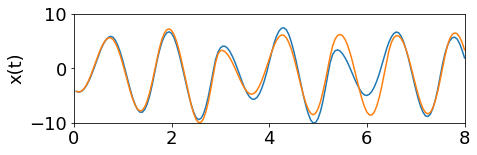

 90%|████████████████████████████████████████████████████████████████████████▉        | 90/100 [00:12<00:01,  7.50it/s]

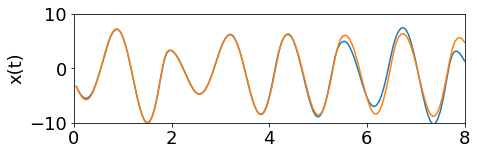

 91%|█████████████████████████████████████████████████████████████████████████▋       | 91/100 [00:12<00:01,  7.49it/s]

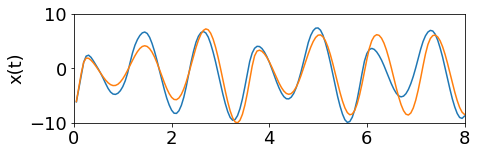

 92%|██████████████████████████████████████████████████████████████████████████▌      | 92/100 [00:12<00:01,  7.34it/s]

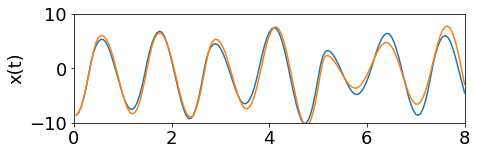

 93%|███████████████████████████████████████████████████████████████████████████▎     | 93/100 [00:12<00:00,  7.52it/s]

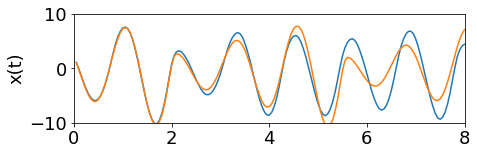

 94%|████████████████████████████████████████████████████████████████████████████▏    | 94/100 [00:12<00:00,  7.46it/s]

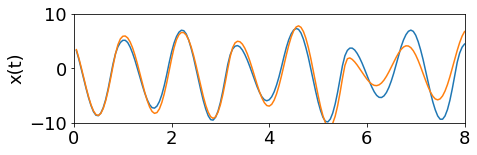

 95%|████████████████████████████████████████████████████████████████████████████▉    | 95/100 [00:12<00:00,  7.47it/s]

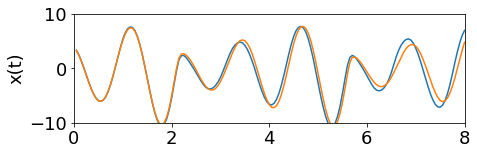

 96%|█████████████████████████████████████████████████████████████████████████████▊   | 96/100 [00:12<00:00,  7.47it/s]

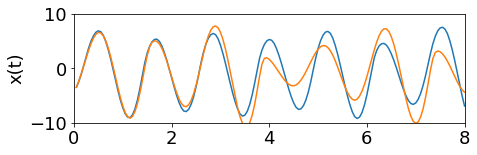

 97%|██████████████████████████████████████████████████████████████████████████████▌  | 97/100 [00:13<00:00,  7.52it/s]

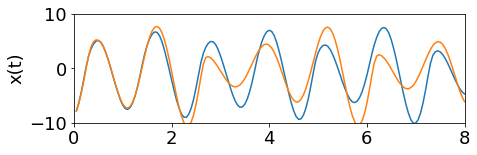

 98%|███████████████████████████████████████████████████████████████████████████████▍ | 98/100 [00:13<00:00,  7.50it/s]

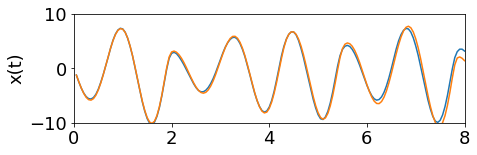

 99%|████████████████████████████████████████████████████████████████████████████████▏| 99/100 [00:13<00:00,  7.56it/s]

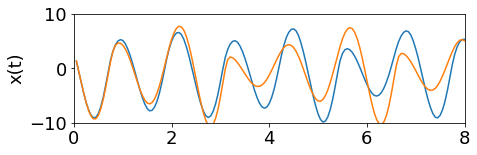

100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.44it/s]

[500. 500. 500. 500. 500. 500. 500. 500. 500. 500. 500. 500. 500. 500.
 500. 500. 500. 500. 500. 500. 500. 500. 500. 500. 500. 500. 500. 500.
 500. 500. 500. 500. 500. 500. 500. 500. 500. 500. 500. 500. 500. 500.
 500. 500. 500. 500. 500. 500. 500. 500. 500. 500. 500. 500. 500. 500.
 500. 500. 500. 500. 500. 500. 500. 500. 500. 500. 500. 500. 500. 500.
 500. 500. 500. 500. 500. 500. 500. 500. 500. 500. 500. 500. 500. 500.
 500. 500. 500. 500. 500. 500. 500. 500. 500. 500. 500. 500. 500. 500.
 500. 500.]


In [4]:
from scipy.special import expit
res_rossler = reservoir(1, 100, input_weight = 0.2*(5.657632325406947-5), leakage =  expit(6.331900407534173-5), \
                        regularization = 10**(-3-0.34132715341987385), forget = 1, seed = 1)
train_length = 2000
sync_length = 500
pred_length = 500
num_tests = 100
results = cross_validation_performance_resync(rossler_data[:,1], res_rossler, num_tests, sync_length, train_length, pred_length, \
         seed = 10, errormax = 10000, train_method = 'Normal', progress = True, plot = True)
print(results)

In [11]:
num_nodes = 100
num_tests = 100
train_length = 10000
sync_length = 500
pred_length = 2000
res_seed = 1
base_res = reservoir(1,num_nodes,input_weight = 1, spectral_radius = 1, seed = res_seed) #Generate a reservoir
mask = ['input_weight', 'regularization', 'leakage']
x0 = np.array([6,6,6])
# Set the minimization function. This function takes num_tests training
# and validation data sets and trains the reservoir to predict each validation set
# after being trained on the corresponding training set. The negative median valid
# time is returned to be minimized.
min_func = lambda x: vt_min_function_norm(rossler_data[:,1], x, mask, base_res.Win, base_res.A, \
     num_tests = num_tests,  num_nodes = num_nodes, pred_length = pred_length, train_length = train_length)
sigma = 2

In [12]:
opts = cma.CMAOptions()
opts.set('popsize',10*x0.size) # Set number of samples per generation
"""
Set bounds on parameters. IMPORTANT: The mean returned by cma-es is
the mean BEFORE the boundary function is applied, so the mean may not
lie in the domain set by bounds. To obtain the true sample mean requires 
downloading the cma-es package from github and editing one of the 
functions. Ask me if you need to do this.
"""
opts.set('bounds', [0,10]) 
opts.set('seed', 5) # Seed for the initial samples
"""
File where results are saved. IMPORTANT: Full covariance matrix is 
NOT saved, nor are the exact samples. If these need to be saved, one
will also have to download from github and make some edits. Again,
ask me.
"""
opts.set('verb_filenameprefix','cmaes_rossler_y_norm_wleakage_res%d\\' % res_seed)
results = cma.fmin(min_func, x0, sigma, options = opts) # Run the algorithm

(15_w,30)-aCMA-ES (mu_w=8.6,w_1=20%) in dimension 3 (seed=5, Thu Jan  7 14:25:01 2021)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1     30 -4.135000000000000e+02 1.0e+00 1.91e+00  2e+00  2e+00 11:15.7
    2     60 -4.010000000000000e+02 1.3e+00 2.14e+00  1e+00  2e+00 22:29.3
    3     90 -4.400000000000000e+02 2.1e+00 1.96e+00  8e-01  2e+00 33:43.9
    4    120 -5.310000000000000e+02 3.2e+00 1.57e+00  5e-01  2e+00 45:01.9
    5    150 -6.585000000000000e+02 4.0e+00 1.50e+00  4e-01  2e+00 56:24.6
    6    180 -6.045000000000000e+02 4.8e+00 1.49e+00  4e-01  2e+00 67:50.8
    7    210 -5.635000000000000e+02 4.7e+00 1.61e+00  5e-01  2e+00 79:03.7
    8    240 -6.320000000000000e+02 5.6e+00 1.69e+00  4e-01  2e+00 90:27.2
    9    270 -6.015000000000000e+02 6.1e+00 1.66e+00  4e-01  2e+00 101:43.5
   10    300 -6.720000000000000e+02 6.9e+00 1.53e+00  3e-01  1e+00 112:58.1
   11    330 -5.750000000000000e+02 6.2e+00 1.45e+00  3e-01  1e+00 124:03.3
   12    360 

In [7]:
from scipy.special import expit
expit(1.3319)

0.791154743394701

In [49]:
res_base = reservoir(4, 360, input_weight = 0.017, regularization = 1e-10, forget = 1)
train_length = 3000
sync_length = 300
pred_length = 500
num_tests = 100
results = cross_validation_performance_resync(rossler_data_w_lowfreq, res_base, num_tests, sync_length, train_length, pred_length, \
         seed = 10, errormax = 3.2, train_method = 'Normal', progress = True)
print(results)
print(np.mean(results))

100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:10<00:00,  9.51it/s]

[ 1. 14. 35. 12.  4.  9.  8.  6.  7. 25. 20. 25.  6. 15. 16. 14.  1. 28.
 26. 96.  6. 16.  3. 10. 40.  9. 67. 27. 38.  8. 44. 27. 11.  9. 42. 17.
 24. 29. 90. 15.  9. 14.  3.  7.  5. 40. 14.  6.  4. 52. 23.  2.  8. 23.
 22. 39.  7.  3.  2.  4. 13.  1.  5.  2. 12. 25. 14.  0.  4.  6.  6. 15.
 25. 18. 40.  3. 12. 12.  1. 27. 33.  6.  2. 43. 35. 28. 18. 21. 36.  8.
 56. 43. 22.  9. 10.  9. 29. 26. 21.  4.]
18.87


In [ ]:
data_length = 100000
step = 0.05
r_t = lambda x: r_t_const(x)
dx_dt = lambda x, time, r_t: dxdt_lorenz(x, time, r_t)
lorenz_data_base = getLorenzData(data_length, r_t, dx_dt, sample_tau = step)

In [ ]:
print(np.mean(lorenz_data_base, axis = 0))
print(np.std(lorenz_data_base, axis = 0))

In [ ]:
res_base = reservoir(3, 300, input_weight = -0.06, input_bias = 0.04, regularization = 1e-7, forget = 0.999)
train_length = 1000
sync_length = 500
pred_length = 500
num_tests = 100
results = cross_validation_performance_resync(lorenz_data_rossler[:,:3], res_base, num_tests, sync_length, train_length, pred_length, \
         seed = 10, errormax = 3.2, train_method = 'Normal', progress = True, plot = False)
print(results)
print(np.mean(results))

In [ ]:
d_res = double_reservoir(6, 400, input_weight = [0.017,0.017], regularization = [1e-10,1e-10], forget = [1,0.99])
train_length = 1000
sync_length = 500
pred_length = 500
num_tests = 50
data = np.append(lorenz_data_rossler[:,:3], lorenz_data_rossler[:,:3], axis = 1)
target_data = lorenz_data_split
results = cross_validation_performance_resync_decompose(data, target_data, d_res, num_tests, sync_length, train_length, pred_length, \
         seed = 5, errormax = 3.2, train_method = 'Normal', progress = True, plot = False)
print(results)
print(np.mean(results))